# Lab 4.1:  Arboles de Decision

<a href="https://drive.google.com/file/d/1Sd_LN-WE_W3Zo-YZrMBe90H2i4_ieFRs/view" target="_blank">
     <img src="http://www.deltanalytics.org/uploads/2/6/1/4/26140521/screen-shot-2019-01-05-at-4-50-19-pm_orig.png" width="500" height="400">
</a>

Los árboles de decisión se pueden usar para tareas de regresión o clasificación. Los árboles de decisión son una herramienta poderosa; sin embargo, son muy propensos a sobreajustar el conjunto de datos de capacitación y, por lo tanto, a menudo no se generalizan bien para probar conjuntos de datos. Sin embargo, son el componente básico de varios otros algoritmos de aprendizaje automático potentes y, por lo tanto, es importante conocerlos.

Lo que haremos en este notebook:
-----

1. Importar paquetes
2. Cargar Datos
3. Construir un Arbol de Decision
4. Parametros de Sintonizacion
5. Importancia de las Caracteristicas
6. Tarea
7. Material Avanzado

Nuestro modelo de regresion lineal anterior asume linealidad entre otros.

Mientras que los árboles de decisión y los algoritmos asociados ya no están restringidos a variables independientes que tienen una relación lineal y no tenemos que asegurarnos de que varios supuestos sean ciertos.

Por lo tanto, podemos comenzar a incorporar otras características que podrían ser útiles.

Después de ejecutar nuestros árboles de decisión, compararemos nuestra nueva salida con nuestra salida de las regresiones lineales que ejecutamos en el cuaderno anterior.

En este cuaderno, veremos cómo podemos predecir el monto del préstamo utilizando árboles de decisión.

Aquí hay una introducción visual a [árboles de decisión](https://algobeans.com/2016/07/27/decision-trees-tutorial/)

----
Instalar Programas Adicionales
-----

Usted necesita tener [graphviz](https://www.graphviz.org/) instalado para mostrar la estructura del arbol mas adelante.

Mac/Windows:

```bash
$ brew install graphviz 
```

Linux:

```bash
$ sudo apt-get install graphviz
```

## 1. Importar Paquetes

In [2]:
"""libreria para mostrar la estructura gráfica del arbol"""
import graphviz 
"""libreria para analisis de datos sobre estructuras flexibles"""
import pandas as pd
"""libreria para uso de arreglos"""
import numpy as np

"""funciones de estilo de comandos para funcionar con MATLAB"""
import matplotlib.pyplot as plt
"""visualizacion de datos"""
import seaborn as sns
%matplotlib inline

"""importacion de data, modelos, etc"""
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.metrics import mean_squared_error, r2_score

## 2. Cargar y formatear datos

In [4]:
"""Cargar datos guardado localmente"""
path = '../data/'
filename = 'loans.csv'
df = pd.read_csv(path+filename)

In [45]:
"""Cargar datos desde GitHub si usa colab"""
!git clone https://github.com/DeltaAnalytics/machine_learning_for_good_data
df = pd.read_csv("machine_learning_for_good_data/loans.csv")

fatal: destination path 'machine_learning_for_good_data' already exists and is not an empty directory.


Vamos a crear regresores para predecir el monto del préstamo y construiremos un árbol que considere muchas de las características del conjunto de datos, incluidas las que hemos diseñado nosotros mismos.

Aquí elegimos un subconjunto limitado de datos para realizar el análisis en pro del tiempo de entrenamiento. En la práctica, deberíamos usar más funciones. Esta es una mezcla de variables categóricas numéricas y una codificadas en caliente. 

In [5]:
"""Descartar todo lo que no sea numerico"""
df = df.select_dtypes(exclude=['object'])

In [6]:
y_column = 'loan_amount'
y = df[y_column]
"""Devuelve una copia del DataFrame con las columnas especificas eliminadas"""  
X = df.drop([y_column, "id_number"], axis=1) # id_number no sera util

In [8]:
"""Separar la data para entrenamiento y testing"""
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 3. Construir un Arbol de Decision
Usaremos sklearn's para la implementacion de un Arbol de Decisiones de Regresion y para aprender como usarlo, aqui estan los documentos [docs](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html#sklearn.tree.DecisionTreeRegressor.get_params), o simplemente ponga un signo de interrogacion "?" antes de llamar a la clase

Anteceder o predeceder un "?" a cualquier metodo, variable, o clase mostrara la documentacion definida de ese metodo (asi se hace IPython!)

In [9]:
DecisionTreeRegressor?

Muchos de los algoritmos de sklearn se implementan utilizando los mismos pasos estándar:

- ** Paso 1: Iniciar el algoritmo ** Definir los parámetros (e hiperparámetros del algoritmo) del algoritmo. Por ejemplo, la profundidad máxima, las muestras mínimas en una hoja, etc. (consulte la documentación para obtener más información)

- ** Paso 2: Entrene el algoritmo ** Entrene el algoritmo ajustándolo a los conjuntos de datos X_train e y_train.

- ** Paso 3: Evaluación del algoritmo ** Evalúe el poder predictivo del algoritmo comparando los valores predictivos del monto del préstamo con los valores reales. Podemos hacer esto para el conjunto de datos de entrenamiento y prueba.

Aquí hay una función que encapsula los 3 pasos de implementación del modelo; Inicializar, entrenar, evaluar nuestro regresor del árbol de decisiones.

In [24]:
def train_score_regressor(sklearn_regressor, X_train, y_train, X_test, y_test, model_parameters, print_oob_score=False):
    """Una función auxiliar que:
         - Entrena a un regresor en datos de entrenamiento
         - Puntúa datos sobre entrenamiento y datos de prueba
         - Devuelve un modelo entrenado
    """
    # Paso 1: Inicializando el sklearn regressor 
    regressor = sklearn_regressor(**model_parameters)
    
    # Paso 2: Entrenando el algoritmo usando el set de datos de caracteristicas X_train y y_train, las caracteristicas de destino asociadas
    regressor.fit(X_train, y_train)
    
    # Step 3: Cálculo de la puntuación del poder predictivo en el conjunto de datos de entrenamiento y prueba.
    training_score = regressor.score(X_train, y_train)
    testing_score = regressor.score(X_test, y_test)
    
    # Imprimir los resultados
    
    # print(f"Train score: {training_score:>5.4f}")
    print(training_score)
    # print(f"Test score: {testing_score:>7.4f}")
    print(testing_score)
    if print_oob_score:
        # print(f"OOB score: {regressor.oob_score_:>8.4f}")
        print(regressor.obb_score)
    return regressor

Con todos los algoritmos de árbol, el desafío principal es utilizar los parámetros para equilibrar el equilibrio entre sesgo y varianza. 

Para comenzar, verifique cómo se forma el modelo al usar los valores predeterminados.

In [25]:
trained_regressor = train_score_regressor(sklearn_regressor=DecisionTreeRegressor,
                                          X_train=X_train, 
                                          y_train=y_train, 
                                          X_test=X_test, 
                                          y_test=y_test, 
                                          model_parameters={'random_state':42})

0.983040081337222
0.8885788330224786


Nuestro módulo logró obtener un puntaje perfecto de r2 en los datos de entrenamiento, pero se desempeñó mal en los datos de la prueba. Esta es una clara indicación de que el modelo tiene ** sobreajuste a los datos de entrenamiento **.

La implementación por defecto del sklearn de DecisionTreeRegressor no impone restricciones en la profundidad del árbol, el número de muestras por hoja, etc. En consecuencia, el modelo encuentra señal en el ruido del conjunto de datos de entrenamiento, se sobreajusta y funciona mal en la prueba datos.

Cuando un modelo se adapta a un conjunto de datos de entrenamiento, decimos que tiene ** alta varianza **. Dado que un árbol de decisión sin restricciones modelará casi a la perfección cualquier dato de entrenamiento, variará enormemente dependiendo de los datos de entrenamiento proporcionados.

### 4. Ajuste de Parametros
Para reducir la varianza, restringimos el modelo utilizando algunos de los parámetros proporcionados, por ejemplo:
- Criterio (función de costo utilizada para medir la pureza de una división)
- Profundidad máxima del árbol.
- Muestras mínimas para cada división de nodo
- Muestras mínimas para cada nodo terminal
- Número máximo de nodos terminales

Mira hacia atras [slides](https://docs.google.com/presentation/d/1leWPbwis9GJHJcQehlhPhtKEAErUPvlTpKjnkv1aWWU/edit?usp=sharing) o utilizar esto [useful blog](https://www.analyticsvidhya.com/blog/2016/04/complete-tutorial-tree-based-modeling-scratch-in-python/#four) para una actualización de los parámetros del árbol de decisiones.

Inicialmente, vamos a experimentar solo con el parámetro max_depth.

In [26]:
# Definir los parametros del modelo
# Estamos arreglando el estado aleatorio para que los resultados sean reproducibles y consistentes.
parameters = {"max_depth":6,
              'random_state':42}

# Entrenamos y evaluamos el modelo
trained_regressor = train_score_regressor(sklearn_regressor=DecisionTreeRegressor,
                                          X_train=X_train, 
                                          y_train=y_train, 
                                          X_test=X_test, 
                                          y_test=y_test, 
                                          model_parameters=parameters)

0.9319316047580971
0.938965237672608


Aunque el puntaje de r2 de entrenamiento ha disminuido significativamente, el puntaje de r2 de prueba aumentó. Dado que el objetivo es desarrollar un modelo que prediga con precisión los datos que nunca hemos visto, ¡esa es la métrica que nos interesa!

Ahora que hemos aumentado el rendimiento, echemos un vistazo a cómo se ve el Árbol de decisión.

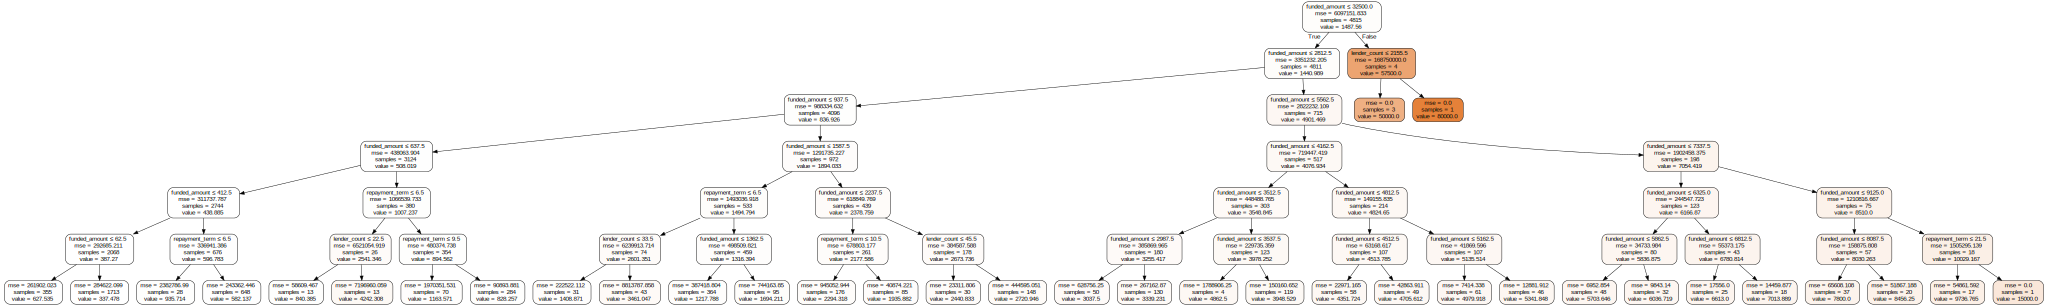

In [27]:
# desde la biblioteca del árbol sklearn, cree una imagen del árbol de decisión entrenado
dot_data = tree.export_graphviz(trained_regressor, out_file=None, 
                         feature_names=X_train.columns,  
                         class_names=y_train.values,  
                         filled=True, rounded=True,  
                         special_characters=True) 
# use graphviz para reproducir la imagen
graph = graphviz.Source(dot_data) 
graph

** IMPORTANTE**

Un DecisionTreeRegressor con una profundidad máxima de solo 4 sigue siendo bastante complicado. Para desarrollar su intuición para los diversos parámetros de entrada, ajústelos manualmente hacia arriba y hacia abajo para ver los impactos.

En general, apuntamos al mayor poder predictivo en el conjunto de pruebas. Sin embargo, si tuviera que ajustar los parámetros manualmente para obtener una puntuación más alta en el conjunto de datos de prueba, nos adaptaríamos a este conjunto de datos de prueba específico y el modelo no se generalizaría bien a un conjunto de datos de prueba secundario.

Para evitar esto, utilizaremos la validación k-fold. Además de la validación de k-fold, usaremos GridSearchCV de sklearn, que nos permite usar la validación de k-fold para evaluar cada permutación de valores posibles para los parámetros que proporcionamos.

Ver el [Advanced Material](#AdvancedCV) en la parte inferior de este notebook para obtener una descripción general rápida de estos dos métodos.

** Nota ** ya que estamos entrenando un regresor una vez por cada posible permutación de valores de parámetros especificados, esta próxima celda tardará un tiempo en ejecutarse. ¡Es por eso que necesita obtener una intuición para saber qué valores probar!

In [28]:
# Establecer parámetros para buscar, lo que se conoce como cuadrícula de parámetros
parameters = {'max_depth':[8,10,14], 
              'min_impurity_decrease': [.1,.01, 0.0],
              'min_samples_split': [10, 50, 2]}
# Inicializar el modelo
decision_regressor= DecisionTreeRegressor(random_state=42)

# Inicializar GridSearch y entonces fit
regressor = GridSearchCV(decision_regressor, parameters)
regressor.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=42, splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'min_impurity_decrease': [0.1, 0.01, 0.0], 'min_samples_split': [10, 50, 2], 'max_depth': [8, 10, 14]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [29]:
# imprima lo que GridSearchCV encontró que son los mejores parámetros
regressor.best_estimator_.get_params()

{'criterion': 'mse',
 'max_depth': 8,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.1,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': False,
 'random_state': 42,
 'splitter': 'best'}

In [30]:
# Evaluar el modelo ajustado
trained_regressor = train_score_regressor(sklearn_regressor=DecisionTreeRegressor,
                                          X_train=X_train, 
                                          y_train=y_train, 
                                          X_test=X_test, 
                                          y_test=y_test, 
                                          model_parameters=regressor.best_estimator_.get_params())

0.9462363358396295
0.9279548250731658


El rendimiento en los datos de prueba ha aumentado nuevamente, ¡no está mal!

El número R ^ 2 anterior es bastante revelador, pero siempre es bueno visualizar cómo se ven en un diagrama de dispersión.

In [31]:
# trazar un gráfico de los valores verdaderos frente a los valores predichos para los conjuntos de datos de entrenamiento y prueba
def plot_y_yhat_scatter(y_actual,y_predicted,train_test):
    ax = sns.regplot(x=y_actual, y=y_predicted, fit_reg=False)
    ax.set_xlabel('true values')
    ax.set_ylabel('predicted values')
    ax.set_title('Relationship between true and predicted loan amounts: '+train_test+' results')
    pass

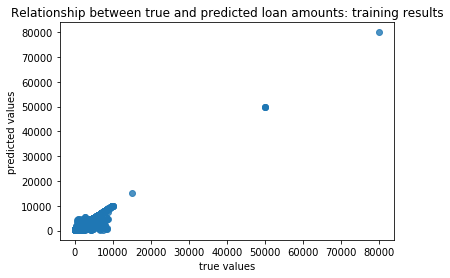

In [32]:
plot_y_yhat_scatter(y_train, trained_regressor.predict(X_train),train_test = "training")

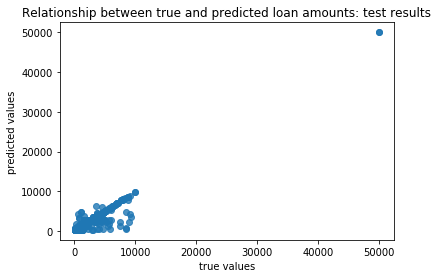

In [33]:
plot_y_yhat_scatter(y_test, trained_regressor.predict(X_test),train_test = "test")

## 5. Importancia de las Caracteristicas

Podemos ver qué características están impulsando las predicciones de nuestro modelo examinando la importancia de las características.

Recuerde que la magnitud de la 'importancia' no es indicativa de cuán importante es la característica, ¡solo importa el orden!

Por ejemplo,
- feature A has an importance of 0.5 
- feature B has an importance of 0.25. 

Todo lo que podemos ver es que la característica A explica más varianza que la característica B, ** no ** esa característica A explica el doble que la característica B.

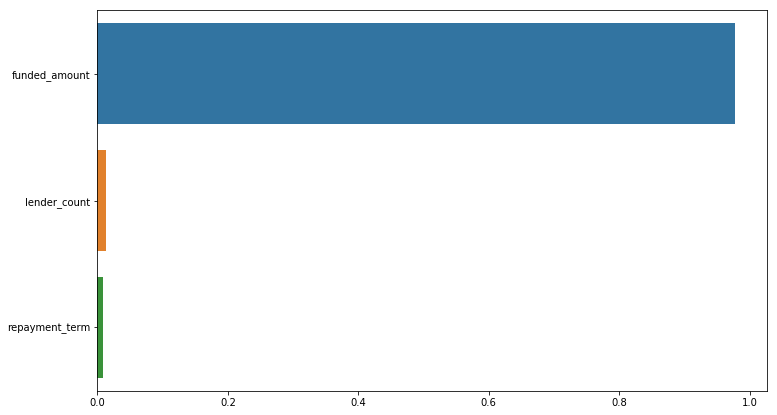

In [34]:
# Obtenga las características importantes de nuestro modelo entrenado final ...
importances = trained_regressor.feature_importances_

# Encuentre los índices de las características importantes en orden descendente
indices = np.argsort(importances)[::-1]

# Trazar un gráfico de barras de las características importantes en orden descendente
plt.figure(figsize=(12,7))
sns.barplot(y=X_train.columns[indices],x=importances[indices]);

No existe una relación clara entre una sola característica y la cantidad de préstamos. La característica más importante es que el prestatario cuenta para One Acre Fund durante su período de préstamo alto; esto es muy específico para un pequeño subconjunto de datos.

Sin embargo, el conjunto de estas características en la decisión lleva a predicciones efectivas (R ^ 2 ~ 0.66). ¡Esto es un testimonio del poder predictivo de los árboles de decisiones!

Recuerde que los árboles de decisión también se pueden usar para clasificar datos.
Por ejemplo, algunas preguntas de clasificación interesantes que podríamos investigar son:

- ¿Podemos clasificar qué préstamos vencieron y cuáles se financiaron?
- ¿Un préstamo publicado por un hombre o una mujer?

## 6. Material avanzado: optimización del algoritmo
<a id='AdvancedCV'></a>

### K-folds ejemplo para encontrar parámetros óptimos

K-folds es un método para evaluar y ajustar un modelo en el conjunto de datos dado sin sobreajustar ni al conjunto de datos de entrenamiento ni al conjunto de datos de prueba. Encuentra el equilibrio óptimo entre sesgo y varianza en el modelo.

A continuación mostramos cómo se desempeña el modelo en los conjuntos de datos de entrenamiento y prueba al tiempo que varía la profundidad máxima del árbol. 

Text(0.5,0,'Max depth of the tree')

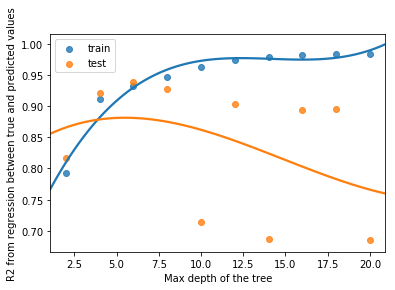

In [35]:
# definir el rango de profundidad máxima
depth_range = np.asarray(range(2,22,2))

# inicializar matrices vacías para almacenar los resultados
scores_train = np.zeros(len(depth_range))
scores_test = np.zeros(len(depth_range))

for i in range(len(depth_range)):
    # Entrenar DTR con profundidad maxima dada
    dt_regressor = DecisionTreeRegressor(max_depth=depth_range[i], random_state=42)
    model = dt_regressor.fit(X_train, y_train)
    # evaluar tanto en conjuntos de datos de entrenamiento como de prueba
    scores_train[i] = model.score(X_train, y_train)
    scores_test[i] = model.score(X_test, y_test)

# trazar los resultados en el mismo gráfico
ax = sns.regplot(x=depth_range, y=scores_train, order=3, ci=None,label='train')
sns.regplot(x=depth_range, y=scores_test,order=3, ci=None, label='test', ax=ax)
ax.legend(loc='best')
ax.set_ylabel('R2 from regression between true and predicted values')
ax.set_xlabel('Max depth of the tree')


A medida que aumenta la profundidad:
- El puntaje de entrenamiento aumenta
- Pero el puntaje de la prueba disminuye

Una vez que el puntaje de la prueba comienza a disminuir, esto indica que el modelo está sobreajustado.

Podríamos sentir la tentación de decir que la profundidad óptima es 8, ya que corresponde a la puntuación máxima para los datos de prueba. **Este no es siempre el caso**. El conjunto de prueba es solo un subconjunto de datos fijo aleatorio, por lo que elegir el parámetro óptimo aquí sería un ajuste excesivo para el conjunto de prueba.

¡Aquí es donde entra en juego la validación cruzada de K-Folds! Este método hace lo siguiente:
- Divide el conjunto de datos K subsistemas aleatorios iguales
- Entrena los datos en subconjuntos K-1
- Evalúa el rendimiento en el subconjunto Kth excluido
- Métrica de evaluación de tiendas
- Se repite para K veces para cada subconjunto aleatorio

Si K = 5, el algoritmo se entrena 5 veces. Cada vez que muestra un quinto de los datos, entrena en los otros 4/5 y luego evalúa el rendimiento en el quinto.

Aquí hay un ejemplo de cómo la puntuación de validación cruzada cambia con la profundidad máxima del árbol

In [36]:
# Inicializar matriz vacia para almacenar resultados
scores_cv = np.empty(len(depth_range))
for i in range(len(depth_range)):
    # Inicializar modelo
    dt_regressor = DecisionTreeRegressor(max_depth=depth_range[i], random_state=42)
    # calcular los puntajes cruzados de val. Esto devuelve una matriz donde cada elemento corresponde al rendimiento en cada k-fold.
    cv_scores = cross_val_score(dt_regressor, X_train, y_train,cv=5, n_jobs=-1)
    # calcular la puntuación media de validación cruzada y guardar
    scores_cv[i] = np.mean(cv_scores)

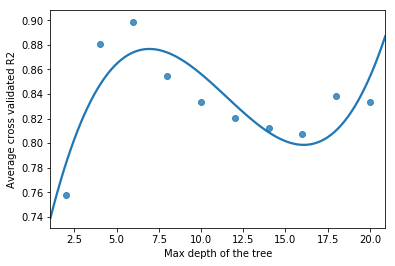

In [37]:
# Trazar resultados
ax = sns.regplot(x=depth_range, y=scores_cv, ci=None, order=3);
ax.set_xlabel('Max depth of the tree');
ax.set_ylabel('Average cross validated R2');

Una vez más, vemos que la misma tendencia general del puntaje aumenta inicialmente y luego cae. A partir de esta curva, la profundidad máxima óptima estaría entre 8 y 10.

### GridSearchCV (CV = validacion cruzada)
Arriba estábamos mirando un solo parámetro. Sin embargo, para aumentar el rendimiento debemos ajustar varios parámetros. 

GridSearchCV de Sklearn utiliza la validación cruzada anterior para evaluar el rendimiento de ** cada permutación posible ** de los hiperparámetros que especifique. Por esta razón, se debe tener cuidado al elegir el rango correcto de parámetros para buscar, ya que agregar un parámetro adicional puede aumentar el tiempo de búsqueda de manera exponencial.

Luego devuelve un modelo inicializado con los parámetros óptimos.

In [38]:
GridSearchCV?

In [39]:
parameters = {'min_impurity_decrease': [.1, 0.01, 0.],
              'max_depth': [None, 5, 8, 10]}

# inicializar modelo
gridrf = DecisionTreeRegressor()

# configurar y ajustar gridsearchCV
grid_rf = GridSearchCV(gridrf, parameters)
grid_rf.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'min_impurity_decrease': [0.1, 0.01, 0.0], 'max_depth': [None, 5, 8, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [40]:
# Evaluar el ajuste del modelo
trained_regressor = train_score_regressor(sklearn_regressor=DecisionTreeRegressor,
                                          X_train=X_train, 
                                          y_train=y_train, 
                                          X_test=X_test, 
                                          y_test=y_test,  
                                          model_parameters=grid_rf.best_estimator_.get_params())

0.9230492570188393
0.9299202418225786


Podemos verificar la variación en el puntaje promedio de validación cruzada para las diferentes permutaciones de parámetros en la búsqueda de cuadrícula y ver qué parámetros tienen el mayor impacto en el rendimiento.

En este caso particular, muestra que max_depth tiene el mayor impacto.

In [41]:
# obtener el puntaje promedio de validación cruzada y el estándar asociado en los pliegues K
means = grid_rf.cv_results_['mean_test_score']
stds = grid_rf.cv_results_['std_test_score']
# imprime la media, estándar y parámetros para cada permutación
for mean, std, params in zip(means, stds, grid_rf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
          % (mean, std * 2, params))

0.778 (+/-0.093) for {'min_impurity_decrease': 0.1, 'max_depth': None}
0.783 (+/-0.100) for {'min_impurity_decrease': 0.01, 'max_depth': None}
0.839 (+/-0.091) for {'min_impurity_decrease': 0.0, 'max_depth': None}
0.886 (+/-0.064) for {'min_impurity_decrease': 0.1, 'max_depth': 5}
0.825 (+/-0.119) for {'min_impurity_decrease': 0.01, 'max_depth': 5}
0.825 (+/-0.119) for {'min_impurity_decrease': 0.0, 'max_depth': 5}
0.883 (+/-0.063) for {'min_impurity_decrease': 0.1, 'max_depth': 8}
0.883 (+/-0.063) for {'min_impurity_decrease': 0.01, 'max_depth': 8}
0.883 (+/-0.063) for {'min_impurity_decrease': 0.0, 'max_depth': 8}
0.868 (+/-0.064) for {'min_impurity_decrease': 0.1, 'max_depth': 10}
0.867 (+/-0.066) for {'min_impurity_decrease': 0.01, 'max_depth': 10}
0.865 (+/-0.060) for {'min_impurity_decrease': 0.0, 'max_depth': 10}


En sus propias palabras, resuma lo que encontró sobre el comportamiento del préstamo.

¿Cuáles son los factores más importantes? ¿Qué consejo le daría a alguien para maximizar sus posibilidades de tener éxito con un préstamo de KIVA?

<br>
<br> 
<br>

----